In [1]:
import pandas as pd

In [34]:
df=pd.read_excel("Crop_recommendation.xlsx",na_values=[' ?',"?","? "])

In [ ]:
df

In [43]:
df.isnull().sum()

N               0
P               0
K               0
temperature     1
humidity        1
ph             15
rainfall        0
label           0
dtype: int64

In [53]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.130000,53.599091,48.282727,25.619655,71.258264,6.470076,102.961693
std,36.884878,32.738511,50.411640,5.061207,22.610531,0.772032,55.109932
min,0.000000,0.000000,0.000000,8.825675,0.000000,3.504752,0.000000
25%,21.000000,29.000000,21.000000,22.770662,60.128680,5.977138,64.236408
50%,37.000000,52.000000,34.500000,25.600169,80.454379,6.420864,94.651497
75%,84.000000,67.000000,48.000000,28.561654,89.935185,6.920651,123.026982
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [36]:
df["K"].fillna(37.0,inplace=True)

In [40]:
df["P"].fillna(52.0,inplace=True)

In [42]:
df["N"].fillna(37.0,inplace=True)

In [45]:
df["humidity"].fillna(80.45,inplace=True)

In [47]:
df["temperature"].fillna(25.60,inplace=True)

In [51]:
df['ph'].fillna(6.42,inplace=True)

In [52]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [62]:
pip install scikit-learn

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Python311\\Lib\\site-packages\\sklearn\\cluster\\tests\\test_birch.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/9.2 MB ? eta -:--:--
                                              0.1/9.2 MB 1.3 MB/s eta 0:00:07
                                              0.2/9.2 MB 1.7 MB/s eta 0:00:06
                                              0.2/9.2 MB 1.5 MB/s eta 0:00:07
     -                                        0.2/9.2 MB 1.3 MB/s eta 0:00:07
     -                                        0.3/9.2 MB 1.3 MB/s eta 0:00:08
     -                                        0.3/9.2 MB 1.2 MB/s eta 0:00:08
     -                                        0.4/9.2 MB 1.2 MB/s eta 0:00:08
     -                                        0.5/9.2 MB 1.2 MB/s eta 0:00:08
     --                                       0.5/9.2 MB 1.2 MB/s eta 0:00:08
     --                                       0.6/9.2 MB 1.2 MB/s eta 0:00:08
     --                                       0.6/9.2 MB 1.2 MB/s eta 0:00:08
     --                                       0.7/9.2 MB 1.2 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
lb=LabelEncoder()

In [69]:
df['crop_encode']=lb.fit_transform(df['label'])

In [70]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_encode
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,20
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,20
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248,rice,20
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000,rice,20
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee,5


In [71]:
df.drop("label",axis=1).corr()

,N,P,K,temperature,humidity,ph,rainfall,crop_encode
N,1.000000,-0.231346,-0.142919,0.026903,0.178457,0.096509,0.044758,-0.034463
P,-0.231346,1.000000,0.734701,-0.124274,-0.111139,-0.134263,-0.068187,-0.481261
K,-0.142919,0.734701,1.000000,-0.163054,0.177864,-0.167001,-0.061411,-0.346844
temperature,0.026903,-0.124274,-0.163054,1.000000,0.199903,-0.020167,-0.026888,0.113503
humidity,0.178457,-0.111139,0.177864,0.199903,1.000000,-0.003682,0.088600,0.197384
ph,0.096509,-0.134263,-0.167001,-0.020167,-0.003682,1.000000,-0.109418,-0.015593
rainfall,0.044758,-0.068187,-0.061411,-0.026888,0.088600,-0.109418,1.000000,0.042314
crop_encode,-0.034463,-0.481261,-0.346844,0.113503,0.197384,-0.015593,0.042314,1.000000


In [72]:
import seaborn as sns

<Axes: >

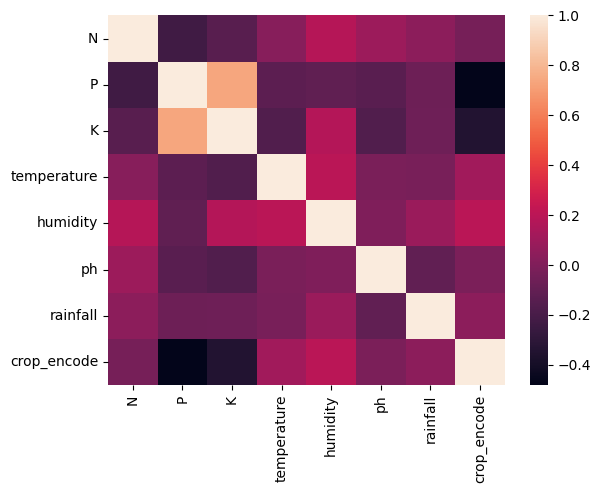

In [73]:
sns.heatmap(df.drop("label",axis=1).corr())

In [75]:
df.shape

(2200, 9)

In [76]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'crop_encode'],
      dtype='object')

In [83]:
x=df.drop(['label','crop_encode'],axis=1)

In [81]:
y=df[['crop_encode']]

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2529)

In [87]:
from sklearn.linear_model import LogisticRegression

In [93]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
514,23.0,52.0,21.0,31.465113,51.799394,8.985348,74.443307
2140,117.0,34.0,25.0,24.838462,56.768532,7.212700,124.413504
567,23.0,37.0,24.0,28.778334,44.225260,7.991902,33.958257
1962,123.0,44.0,21.0,25.785445,75.005393,7.641117,91.395789
1802,13.0,28.0,33.0,28.130115,95.648076,5.686973,151.076190
...,...,...,...,...,...,...,...
1719,57.0,57.0,51.0,39.017933,91.488156,6.992234,105.884153
123,83.0,52.0,21.0,18.833445,58.750820,5.716223,79.753290
906,21.0,21.0,38.0,22.552606,89.325949,6.327674,104.895564
886,28.0,79.0,16.0,24.706264,60.268542,6.052185,53.124429


In [94]:
y_test

,crop_encode
514,13
2140,5
567,13
1962,6
1802,4
...,...
1719,17
123,11
906,19
886,10


In [88]:
lg=LogisticRegression()

In [89]:
lg.fit(x_train,y_train)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
lg.score(x_test,y_test)

0.9181818181818182

In [ ]:
#how to use our model ,we have to save in pickle files

In [91]:
import pickle

In [92]:
with open("model.pkl","wb")as model_file:
    pickle.dump(lg,model_file)